# Tarea 1, Elección Discreta
### Juan José Merino Zarco 

### Pregunta 1 Logit condicional (50 puntos)

In [146]:
# Importar las librerias necesarias
import pandas as pd
import numpy as np
from scipy import optimize
from sympy import symbols, Matrix, Transpose
from math import e, log, exp
from scipy.optimize import minimize
import math
import numdifftools as nd
import os

In [ ]:
os.chdir("D:/Usuario/Desktop/Cuarto Semestre/Elección discreta/Tarea 1") #Definir carpeta de trabajo

In [147]:
# Importar la base de datos
yogurth = pd.read_csv("yogurt.csv")

In [148]:
yogurth.head() #Analizamos las variables de la base de datos

,pan.id,expend,income,hhsize,quantity,brand1,brand2,brand3,brand4,feat1,feat2,feat3,feat4,price1,price2,price3,price4,panfirstobs
0,1,40.900002,9,2,2,0,0,0,1,0,0,0,0,0.108,0.081,0.061,0.079,1
1,1,16.809999,9,2,2,0,1,0,0,0,0,0,0,0.108,0.098,0.064,0.075,0
2,1,4.060000,9,2,2,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,0
3,1,34.459999,9,2,2,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,0
4,1,8.390000,9,2,2,0,1,0,0,0,0,0,0,0.125,0.098,0.049,0.079,0


In [149]:
def modelo_yogurth(x):
    """Logit condicional usando los datos en yogurt.csv."""
    alph1,alph2,alph3,bp,bf = x
    # Valores vacios
    num = 0
    lden = 0
    calc = 0
    alph4 = 0
    alphas=[alph1, alph2, alph3, alph4]
    
    for index, row in yogurth.iterrows():
        #Numerador (realizamos las operaciones correspondientes para el númerador de la ecuación a maximizar)
        for producto in range(4):
            num = num + row[5+producto]* (alphas[producto]+ bp*row[13+producto] + bf*row[9+producto])
        
        
        #Denominador (realizamos las operaciones correspondientes para el denominador de la ecuación a maximizar)
        den = 0
        for producto in range(4):
            den = den + e**(alphas[producto]+ bp*row[13+producto] + bf*row[9+producto])
       
        # Aplicamos el resto de la función, junto a la sumatoria faltante
        for producto in range(4):
            lden = lden + row[5+producto]* log(den)
            
    #Realizamos el cálculo de la función que nos dará la ecuación completa y al final se multiplica por -1 para que sea una maximización
    calc = calc + (num-lden)
    return (calc*-1)

### Corremos varios modelos para robustez 

In [201]:
#Corremos el modelo con el método de optimización BFGS
x0 = [1,1,1,1,1]
optimize.minimize(modelo_yogurth, x0, method = "BFGS") 

      fun: 2658.5567041774857
 hess_inv: array([[ 1.05164204e-03, -6.08229964e-05, -1.01467086e-03,
         2.90953841e-03, -7.27087112e-05],
       [-6.08229964e-05,  3.73977543e-03,  1.97541753e-03,
         5.41563773e-02,  3.15377610e-03],
       [-1.01467086e-03,  1.97541753e-03,  1.15643224e-02,
         3.91743576e-02,  2.96343904e-03],
       [ 2.90953841e-03,  5.41563773e-02,  3.91743576e-02,
         8.44203900e-01,  6.51267223e-02],
       [-7.27087112e-05,  3.15377610e-03,  2.96343904e-03,
         6.51267223e-02,  1.50519226e-02]])
      jac: array([ 0.03225708, -0.02999878,  0.01229858,  0.00531006, -0.00912476])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 548
      nit: 17
     njev: 88
   status: 2
  success: False
        x: array([  1.38799835,   0.64349903,  -3.08611543, -37.06430818,
         0.48720204])

In [197]:
#Corremos el modelo con el método de optimización Nelder Mead
x0 = [1,1,1,1,1]
optimize.minimize(modelo_yogurth, x0, method = "Nelder-Mead") 

 final_simplex: (array([[  1.38775366,   0.64350447,  -3.08611826, -37.05796121,
          0.48741018],
       [  1.387753  ,   0.64350375,  -3.08611516, -37.05789162,
          0.48741456],
       [  1.38775643,   0.64350576,  -3.08611752, -37.05801966,
          0.48741336],
       [  1.38775658,   0.64350536,  -3.08611639, -37.05800015,
          0.48741039],
       [  1.3877559 ,   0.64350585,  -3.08611892, -37.05795726,
          0.48741329],
       [  1.38775498,   0.6435039 ,  -3.08612291, -37.05804902,
          0.48741465]]), array([2658.55669751, 2658.55669751, 2658.55669751, 2658.55669751,
       2658.55669751, 2658.55669751]))
           fun: 2658.5566975057964
       message: 'Optimization terminated successfully.'
          nfev: 544
           nit: 340
        status: 0
       success: True
             x: array([  1.38775366,   0.64350447,  -3.08611826, -37.05796121,
         0.48741018])

In [198]:
#Corremos el modelo con el método de optimización L-BFGS-B
x0 = [1,1,1,1,1]
optimize.minimize(modelo_yogurth, x0, method = "L-BFGS-B") 

      fun: 2658.5567395838625
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00982254,  0.00645741, -0.00140972,  0.01550688, -0.00623004])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 246
      nit: 26
     njev: 41
   status: 0
  success: True
        x: array([  1.38709327,   0.64342412,  -3.08555182, -37.03610981,
         0.48754416])

### Modelo final (método BFGS)

In [173]:
x0 = [1,1,1,1,1]  #Establecemos el punto inicial para la optimización
modelo = optimize.minimize(modelo_yogurth, x0, method = "Nelder-Mead")  #Terminación exitosa

In [175]:
# Obtenemos los coeficientes estimados 
betas_hat = modelo["x"]
betas_hat

array([  1.38799835,   0.64349903,  -3.08611543, -37.06430818,
         0.48720204])

In [176]:
# Errores estándar
# Iniciamos un proceso de varios pasos en código para obtener los errores estándar de los estimadores 
hessiano_inv = modelo["hess_inv"]  #Obtenemos la inversa del Hessiano evaluado en el óptimo. Esto es dado por la optimización.
hessiano_inv

array([[ 1.05164204e-03, -6.08229964e-05, -1.01467086e-03,
         2.90953841e-03, -7.27087112e-05],
       [-6.08229964e-05,  3.73977543e-03,  1.97541753e-03,
         5.41563773e-02,  3.15377610e-03],
       [-1.01467086e-03,  1.97541753e-03,  1.15643224e-02,
         3.91743576e-02,  2.96343904e-03],
       [ 2.90953841e-03,  5.41563773e-02,  3.91743576e-02,
         8.44203900e-01,  6.51267223e-02],
       [-7.27087112e-05,  3.15377610e-03,  2.96343904e-03,
         6.51267223e-02,  1.50519226e-02]])

In [177]:
hessiano = np.linalg.inv(hessiano_inv)  #Sacamos la inversa del hessiano inverso para tener el hessiano original
hessiano

array([[ 697629.37221544, 1826101.31089503,  184279.95423627,
        -144167.80033842,  208257.97719531],
       [1826101.31089501, 4787620.51721891,  482794.55368633,
        -377942.09821352,  545916.18547406],
       [ 184279.95423626,  482794.55368633,   48804.27082623,
         -38118.83378169,   55056.02688032],
       [-144167.80033842, -377942.09821352,  -38118.83378169,
          29837.47313902,  -43103.56249922],
       [ 208257.97719531,  545916.18547407,   55056.02688032,
         -43103.56249922,   62349.73051413]])

In [178]:
I =  np.dot((-1/2430), hessiano) #Hacemos operaciones para obtener el valor I y posteriormente la matriz de varianzas y covarianzas
I

array([[ -287.09027663,  -751.48202094,   -75.83537211,    59.3283129 ,
          -85.70287127],
       [ -751.48202094, -1970.21420462,  -198.68088629,   155.53172766,
         -224.65686645],
       [  -75.83537211,  -198.68088629,   -20.08406207,    15.68676287,
          -22.65680119],
       [   59.3283129 ,   155.53172766,    15.68676287,   -12.27879553,
           17.73809156],
       [  -85.70287127,  -224.65686645,   -22.65680119,    17.73809156,
          -25.65832531]])

In [179]:
mat_var_cov = np.linalg.inv(I)  #Aplicamos la matriz inversa a I y así obtenemos la matriz de varianzas y covarianzas
mat_var_cov = np.dot(-1,mat_var_cov)  #Multiplicamos por -1 dado que la función original la habíamos multiplicado por -1.
mat_var_cov

array([[ 2.55549016e+00, -1.47799881e-01, -2.46565020e+00,
         7.07017835e+00, -1.76682168e-01],
       [-1.47799881e-01,  9.08765430e+00,  4.80026459e+00,
         1.31599997e+02,  7.66367592e+00],
       [-2.46565020e+00,  4.80026459e+00,  2.81013034e+01,
         9.51936889e+01,  7.20115687e+00],
       [ 7.07017834e+00,  1.31599997e+02,  9.51936889e+01,
         2.05141548e+03,  1.58257935e+02],
       [-1.76682168e-01,  7.66367592e+00,  7.20115687e+00,
         1.58257935e+02,  3.65761718e+01]])

In [180]:
np.shape(mat_var_cov)

(5, 5)

In [181]:
# Errores estándar en orden (alpha1, alpha2, alpha3, beta_price, beta_feat)
for i in range(5):
    e_e = (math.sqrt(mat_var_cov[i,i]))  / (math.sqrt(2430))
    print(e_e) 


0.03242903082124185
0.06115370333979283
0.1075375394208378
0.9188056923352057
0.12268627701363234


In [183]:
# Valor de la máxima verosimilitud 
mv_betas = - modelo_yogurth(modelo["x"])
mv_betas

-2658.5567041774857

In [184]:
# Valor para las coeficientes en cero 
mv_ceros = - modelo_yogurth((0,0,0,0,0))
mv_ceros

-3368.6952975211507

In [185]:
# Índice de razón de verosimilitud 
razon_vero = 1 - (mv_betas / mv_ceros)    
razon_vero

0.2108052318849435

In [186]:
# Criterior de información de Akaike (AIC) 
aic = (-2 * mv_betas) + (2*5)     #5 parametros 
aic


5327.113408354971

In [7]:
# Elasticidades 
yogurth.head()

,pan.id,expend,income,hhsize,quantity,brand1,brand2,brand3,brand4,feat1,feat2,feat3,feat4,price1,price2,price3,price4,panfirstobs
0,1,40.900002,9,2,2,0,0,0,1,0,0,0,0,0.108,0.081,0.061,0.079,1
1,1,16.809999,9,2,2,0,1,0,0,0,0,0,0,0.108,0.098,0.064,0.075,0
2,1,4.060000,9,2,2,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,0
3,1,34.459999,9,2,2,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,0
4,1,8.390000,9,2,2,0,1,0,0,0,0,0,0,0.125,0.098,0.049,0.079,0


In [187]:
def probabilidad_eles(dataframe):
    """Logit condicional usando los datos en yogurt.csv."""
    # Importar la base de datos
    moi = pd.read_csv(dataframe)
    #Parametros
    # alph1,alph2,alph3,bp,bf = x
    #Evaluando los parametros en el optimo
    alph1 = 1.38796
    alph2 = 0.643527
    alph3 = -3.086088
    alph4 = 0
    bp    = -37.0679
    bf    = 0.4876 
    # Valores vacios
    num = 0
    lden = 0
    calc = 0
    conca1, conca2, conca3, conca4= [],[],[],[]
    alphas=[alph1, alph2, alph3, alph4]
    for index, row in moi.iterrows():

        #Denominador
        den = 0
        for producto in range(4):
            den += exp(alphas[producto]+ bp*row[13+producto] + bf*row[9+producto])
       
        # Probabilidad
        proby1 = 0
        proby2 = 0
        proby3 = 0
        proby4 = 0
        for producto in range(4):
            
            num = exp(alphas[producto]+ bp*row[13+producto] + bf*row[9+producto])  #Numerador de la ecuación
            
            if producto == 0:         #Creamos 4 columnas (variables) a partir de una condición para cada probabilidad de cada producto
                proby1 += (num)/den
     
            elif producto == 1:
                proby2 += (num)/den
     
            elif producto == 2:
                proby3 += (num)/den
       
            else:
                proby4 += (num)/den
    
                     
        conca1.append(proby1)   #Con este codigo logramos generar las columnas finales de cada probabilidad de cada producto
        conca2.append(proby2)
        conca3.append(proby3)
        conca4.append(proby4)
        
    base = pd.concat([moi,pd.DataFrame(conca1)],axis=1)   #Unimos cada columna en un solo dataframe
    base.rename({0: 'proba1'}, axis=1, inplace=True)
    base = pd.concat([base,pd.DataFrame(conca2)],axis=1)
    base.rename({0: 'proba2'}, axis=1, inplace=True)
    base = pd.concat([base,pd.DataFrame(conca3)],axis=1)
    base.rename({0: 'proba3'}, axis=1, inplace=True)
    base = pd.concat([base,pd.DataFrame(conca4)],axis=1)
    base.rename({0: 'proba4'}, axis=1, inplace=True)
    
    
    #Calculo
    return base #La función devuelve la base final con las 4 columnas de probabilidad 

In [190]:
elas = probabilidad_eles("yogurt.csv")  #Generamos un dataframe uniendo a yogurth con las columnas de probabilidad

In [191]:
elas.insert(22, "Bz", -37.0679, allow_duplicates=False)   #Creamos una columna con el valor estimado de beta_price (esta es la derivada)

In [192]:
##Los valores de la probabilidad, los precios y la beta_price los cambiamos a formato float
elas["proba1"] = elas["proba1"].astype(float, errors = 'raise')
elas["proba2"] = elas["proba2"].astype(float, errors = 'raise')
elas["proba3"] = elas["proba3"].astype(float, errors = 'raise')
elas["proba4"] = elas["proba4"].astype(float, errors = 'raise')
elas["Bz"] = elas["Bz"].astype(float, errors = 'raise')
elas["price1"] = elas["price1"].astype(float, errors = 'raise')
elas["price2"] = elas["price2"].astype(float, errors = 'raise')
elas["price3"] = elas["price3"].astype(float, errors = 'raise')
elas["price4"] = elas["price4"].astype(float, errors = 'raise')

In [193]:
# Elasticidades propias
# Procedemos a calcular las elasticidades propias creando 4 columnas por cada elasticidad para todas las filas
elas["elas_prop1"] = elas["Bz"] * elas["price1"] * (1-elas["proba1"])
elas["elas_prop2"] = elas["Bz"] * elas["price2"] * (1-elas["proba2"])
elas["elas_prop3"] = elas["Bz"] * elas["price3"] * (1-elas["proba3"])
elas["elas_prop4"] = elas["Bz"] * elas["price4"] * (1-elas["proba4"])

In [194]:
# Elasticidades propias
# Procedemos a calcular la media de cada elasticidad (columnas creadas anteriormente) y así tener la elasticidad promedio final.
mean_elas_prop1 = elas["elas_prop1"].mean()
mean_elas_prop2 = elas["elas_prop2"].mean()
mean_elas_prop3 = elas["elas_prop3"].mean()
mean_elas_prop4 = elas["elas_prop4"].mean()
print(mean_elas_prop1, mean_elas_prop2,mean_elas_prop3,mean_elas_prop4)

-2.7018539273468907 -1.8449276745364236 -1.9335257784215978 -2.2883520840465748


In [195]:
# Elasticidades cruzadas
# Procedemos a calcular las elasticidades cruzadas creando 4 columnas por cada elasticidad para todas las filas
elas["elas_cru21"] = elas["Bz"] * elas["price1"] * (-elas["proba1"])
elas["elas_cru12"] = elas["Bz"] * elas["price2"] * (-elas["proba2"])
elas["elas_cru13"] = elas["Bz"] * elas["price3"] * (-elas["proba3"])
elas["elas_cru14"] = elas["Bz"] * elas["price4"] * (-elas["proba4"])

In [196]:
# Elasticidades cruzadas
# Procedemos a calcular la media de cada elasticidad (columnas creadas anteriormente) y así tener la elasticidad promedio final.
mean_elas_cru1 = elas["elas_cru21"].mean()
mean_elas_cru2 = elas["elas_cru12"].mean()
mean_elas_cru3 = elas["elas_cru13"].mean()
mean_elas_cru4 = elas["elas_cru14"].mean()
print(mean_elas_cru1, mean_elas_cru2,mean_elas_cru3,mean_elas_cru4)

1.2365265439885769 1.1772807967618553 0.05412215776737161 0.6588206521043347


## Pregunta 2: Fake data (50 puntos)

In [202]:
import pandas as pd
import numpy as np
import random
from scipy import optimize, stats
from math import e, log,exp
import math as mt
import matplotlib.pyplot as plt 
from scipy.stats import bernoulli

### 1. Generación de 100 bases de datos con 5000 observaciones cada una 

Se generaran datos pseudo-aleatorios , empleando una distribución de Bernoulli para construir la característica "feat", una distribución log-normal para los precios de  los 4 productos para las N observaciones.

In [209]:
    """Creación de las bases de datos"""
    # Parametros de la función
    ## N = Número de datos, ##J= Número de bases
    N=5000
    J=100
    # Precios promedio
    yogurt = pd.read_csv("yogurt.csv")
    precios = yogurt[['price1', 'price2', 'price3', 'price4']]
    precios_promedio = list(precios.mean())
    
    # Valores de los parámetros
    beta_p_s=np.array([1,-1,0.5,0,-20,2])

    #  Valores vacios
    base_precios = pd.DataFrame(np.nan, index = range(N), columns = ['price1', 'price2', 'price3', 'price4'])
    atributos = pd.DataFrame(np.nan, index = range(N), columns = ['feat1', 'feat2', 'feat3', 'feat4'])
    dict_data_frames = {}

    # Creación de las bases
    bases = [str("base") + str(x) for x in range(J)]

    # Generar las características en cada base
    for base in bases:
        for j in range(4): 
            base_precios.iloc[:,j] = np.random.lognormal(precios_promedio[j],0.6,N)
            atributos.iloc[:,j] = bernoulli.rvs(size = N,p = 0.5)
            df = pd.concat([base_precios,atributos], axis=1)

        dict_data_frames[base] = df 


    # Loop para simular la elección de los consumidores
    for base in bases:

        ele1,ele2,ele3,ele4 = [],[],[],[]

        for index, row in dict_data_frames[base].iterrows():
            s_1 = np.array([1,0,0,0,row[0],row[4]])
            s_2 = np.array([0,1,0,0,row[1],row[5]])
            s_3 = np.array([0,0,1,0,row[2],row[6]])
            s_4 = np.array([0,0,0,1,row[3],row[7]])

            for i in [1,2,3,4]: 
                globals()['exp_%s' %i] = mt.exp(np.dot(globals()['s_%s' %i],beta_p_s))    #iterar por nombres

            total_exp = exp_1+exp_2+exp_3+exp_4

            for j in [1,2,3,4]:
                globals()['prob_%s' %j] = (globals()['exp_%s' %j]) / (total_exp)

            eleccion=np.random.choice((1,2,3,4),p=[prob_1,prob_2,prob_3,prob_4])

            if eleccion==1:
                ele1.append(1)
                ele2.append(0)
                ele3.append(0)
                ele4.append(0)

            elif eleccion==2:
                ele1.append(0)
                ele2.append(1)
                ele3.append(0)
                ele4.append(0)
            elif eleccion==3:
                ele1.append(0)
                ele2.append(0)
                ele3.append(1)
                ele4.append(0)
            else:
                ele1.append(0)
                ele2.append(0)
                ele3.append(0)
                ele4.append(1)

        dict_data_frames[base]["brand1"]=ele1 
        dict_data_frames[base]["brand2"]=ele2
        dict_data_frames[base]["brand3"]=ele3  
        dict_data_frames[base]["brand4"]=ele4 
        
    # Guardo el diccionario de todas las bases de datos utilizado en un objeto
    
    fin = dict_data_frames
              


Procedemos a incorporar las bases de datos simuladas en la función para evaluar el modelo de logit condicional

In [210]:
def modelo_yogurth_MC(x,diccionario,base_de_datos):
    """Logit condicional usando los datos de la base proxy"""
    #Parametros desconocidos
    [alph1,alph2,alph3,bp,bf] = x 
    #Normalizar \alpha_{4} = 0
    alph4 = 0
    # Valores vacios
    lden = 0
    # Importar la base de datos
    # diccionario = el diccionario que contiene las 100 bases
    # base_de_datos = base contenia en el diccionario
    dict_data_frames = diccionario
    data = dict_data_frames[base_de_datos]
    # Variables para cada producto
    alphas =[alph1,alph2,alph3,alph4] 
    precios = ["price1","price2","price3","price4"]
    Yin = ["brand1","brand2","brand3","brand4"]
    feat = ["feat1","feat2","feat3","feat4"]
    
    for index, row in data.iterrows():

        #Denominador
        den = 0
        for producto in range(4):
            den += exp(alphas[producto]+ bp*row[precios[producto]] + bf*row[feat[producto]])
       
        # Logaritmo natual de la suma
        for producto in range(4):
            if den == 0:
                continue
            else:
                #Numerador
                lden += row[Yin[producto]]* log(exp(alphas[producto]+ bp*row[precios[producto]] + bf*row[feat[producto]])/den)
                moly = -lden
    return moly

Ahora, vamos a realizar la optimizacion para las 100 bases de datos mediante la siguiente función

In [211]:
def Monte_carlo():
    conca = pd.DataFrame()
    for index, (key, value) in enumerate(dict_data_frames.items()):
        print(index) # Control de tiempo
        result = optimize.minimize(modelo_yogurth_MC, x0=[0,0,0,0,0],args=(fin,key))
        conca = pd.concat([conca,pd.DataFrame(result.x)],axis=1)
    conca = pd.DataFrame.transpose(conca)   
    conca.rename({0: 'alph1',1: 'alph2',2: 'alph3',3: 'bp',4: 'bf'}, axis=1, inplace=True)
    conca["alph4"] = 0
    conca.reset_index(drop=True, inplace=True)
    return conca

Se guardan los resultados en un archivo csv para la posterior utilización de los datos

In [ ]:
MC_save = pd.DataFrame(Monte_carlo())
MC_save.to_csv("MC_save.csv")

### Mediana de los estimadores para cada uno de los 5 coeficientes.

In [212]:
# Cargamos los datos
base_B = pd.read_csv("MC_save.csv")
print(pd.DataFrame.median(base_B))

Unnamed: 0    12.000000
alph1          0.940027
alph2         -0.909311
alph3          0.554207
bp           -19.570920
bf             1.912652
alph4          0.000000
dtype: float64


### Histograma con la distribución de los estimadores para cada coeficiente.

In [213]:
base_B.drop(base_B.columns[0], axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'alph1'}>,
        <AxesSubplot:title={'center':'alph2'}>],
       [<AxesSubplot:title={'center':'alph3'}>,
        <AxesSubplot:title={'center':'bp'}>],
       [<AxesSubplot:title={'center':'bf'}>,
        <AxesSubplot:title={'center':'alph4'}>]], dtype=object)

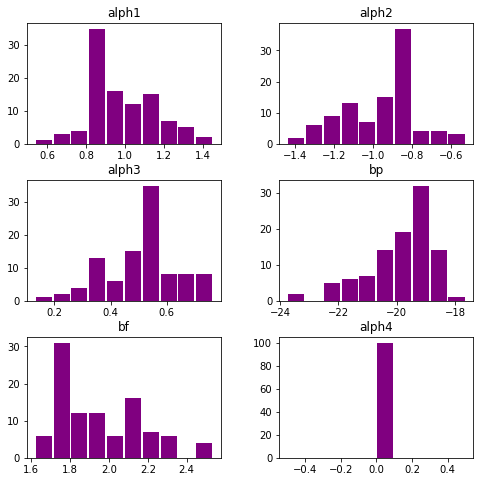

In [214]:
base_B.hist(layout=(3,2),figsize=(8,8),grid=False,color="#800080",zorder=2, rwidth=0.9)

## Fin 